In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [4]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


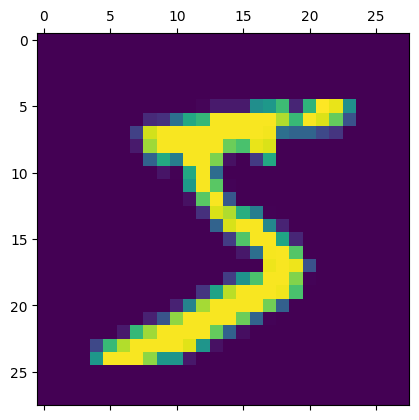

In [5]:
plt.matshow(x_train[0])

In [6]:
x_train=x_train/255
x_test=x_test/255

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.6498 - accuracy: 0.8375 - val_loss: 0.3617 - val_accuracy: 0.9012
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3393 - accuracy: 0.9054 - val_loss: 0.2981 - val_accuracy: 0.9176
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2898 - accuracy: 0.9191 - val_loss: 0.2642 - val_accuracy: 0.9274
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2586 - accuracy: 0.9274 - val_loss: 0.2392 - val_accuracy: 0.9338
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2350 - accuracy: 0.9348 - val_loss: 0.2211 - val_accuracy: 0.9369
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2161 - accuracy: 0.9398 - val_loss: 0.2051 - val_accuracy: 0.9433
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2003 - accuracy: 0.9444 - val_loss: 0.1920 - val_accuracy:

In [17]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.1620 - accuracy: 0.9547
Loss=0.162
Accuracy=0.955


<function matplotlib.pyplot.show(close=None, block=None)>

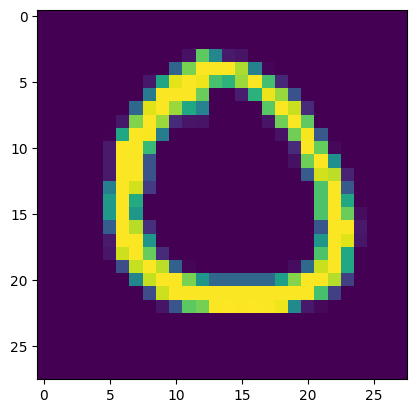

In [18]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

In [19]:
test_predict=model.predict(x_test)
test_predict_labels=np.argmax(test_predict,axis=1)
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=test_predict_labels)
print('confusion matrix of the test set :\n', confusion_matrix)

313/313 [==============================] - 1s 4ms/step
confusion matrix of the test set :
 tf.Tensor(
[[ 962    0    1    1    0    4    9    1    2    0]
 [   0 1118    2    2    0    1    3    2    7    0]
 [   7    1  975    9    4    3   10    8   13    2]
 [   0    1    9  961    0   11    1    8   13    6]
 [   1    1    4    1  936    1   11    2    4   21]
 [   8    1    1   16    2  839   10    2    8    5]
 [   9    3    2    1    8    8  924    0    3    0]
 [   2    7   20    3    5    1    0  973    2   15]
 [   3    4    4   14    6    7    8    9  915    4]
 [   8    6    2    8   21    4    1    9    6  944]], shape=(10, 10), dtype=int32)
